#Shireeshma Parepalli

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from functools import reduce
from sklearn import preprocessing

In [2]:
# read in datasets
carpet= pd.read_csv('carpet.csv', header=None)
hardwood = pd.read_csv('hardwood.csv' , header=None)

In [3]:
#first 3 rows of data
carpet.head(3)

0       1       2       3       4       5       6       7       8   \
0  170.39  167.28  143.44  124.67  139.01  125.83  144.33  151.26  175.51   
1  169.75  190.96  175.53  138.27  137.47  139.23  133.23  130.25  147.73   
2  153.69  153.68  144.02  158.73  178.87  157.04  152.92  147.52  142.87   

       9   ...      54      55      56      57      58      59      60  \
0  171.31  ...  172.96  169.67  157.51  161.06  133.23  124.41  138.44   
1  163.93  ...  139.58  141.58  153.39  141.00  148.43  168.12  169.90   
2  165.26  ...  155.19  170.51  155.37  167.11  146.89  141.01  159.43   

       61      62      63  
0  142.93  137.13  134.44  
1  165.64  166.86  137.69  
2  169.68  163.24  165.17  

[3 rows x 64 columns]

#Number of oservations = 1024 (rows)  by Dimensions = 64 (columns) for carpet

In [4]:
#Dimension
carpet.shape

(1024, 64)

In [5]:
carpet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 64 columns):
0     1024 non-null float64
1     1024 non-null float64
2     1024 non-null float64
3     1024 non-null float64
4     1024 non-null float64
5     1024 non-null float64
6     1024 non-null float64
7     1024 non-null float64
8     1024 non-null float64
9     1024 non-null float64
10    1024 non-null float64
11    1024 non-null float64
12    1024 non-null float64
13    1024 non-null float64
14    1024 non-null float64
15    1024 non-null float64
16    1024 non-null float64
17    1024 non-null float64
18    1024 non-null float64
19    1024 non-null float64
20    1024 non-null float64
21    1024 non-null float64
22    1024 non-null float64
23    1024 non-null float64
24    1024 non-null float64
25    1024 non-null float64
26    1024 non-null float64
27    1024 non-null float64
28    1024 non-null float64
29    1024 non-null float64
30    1024 non-null float64
31    1024 non-null float

#Assigning Column names as Feature0 ... to Feture63 for 64 columns for carpet

In [6]:
carpet.columns = ["Feature"+ str(x) for x in range(len(carpet.columns))]

In [7]:
#Last 3 rows of data with given column names
carpet.tail(3)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
1021    175.99    141.08    108.38    112.21    154.76    169.35    122.90   
1022    149.07    162.87    135.28    109.56    120.13    148.60    149.28   
1023    140.06    160.04    186.07    170.71    158.59    149.36    120.46   

      Feature7  Feature8  Feature9  ...  Feature54  Feature55  Feature56  \
1021    127.48    168.85    138.18  ...     111.46     139.48     166.88   
1022    142.19    120.19    101.61  ...     111.55     114.36     137.15   
1023    107.76    137.16    160.70  ...     157.79     170.13     133.74   

      Feature57  Feature58  Feature59  Feature60  Feature61  Feature62  \
1021     168.06     130.39     145.01     163.59     159.40     137.95   
1022     151.60     180.60     175.67     154.18     123.14     105.21   
1023     125.17     118.13     121.13     125.22     137.77     143.07   

      Feature63  
1021     134.96  
1022     104.68  
1023     152.65  

[3 rows x 64 columns]

#Count missing data in each column

In [8]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
  print(carpet.isnull().sum())

Feature0     0
Feature1     0
Feature2     0
Feature3     0
Feature4     0
Feature5     0
Feature6     0
Feature7     0
Feature8     0
Feature9     0
Feature10    0
Feature11    0
Feature12    0
Feature13    0
Feature14    0
Feature15    0
Feature16    0
Feature17    0
Feature18    0
Feature19    0
Feature20    0
Feature21    0
Feature22    0
Feature23    0
Feature24    0
Feature25    0
Feature26    0
Feature27    0
Feature28    0
Feature29    0
Feature30    0
Feature31    0
Feature32    0
Feature33    0
Feature34    0
Feature35    0
Feature36    0
Feature37    0
Feature38    0
Feature39    0
Feature40    0
Feature41    0
Feature42    0
Feature43    0
Feature44    0
Feature45    0
Feature46    0
Feature47    0
Feature48    0
Feature49    0
Feature50    0
Feature51    0
Feature52    0
Feature53    0
Feature54    0
Feature55    0
Feature56    0
Feature57    0
Feature58    0
Feature59    0
Feature60    0
Feature61    0
Feature62    0
Feature63    0
dtype: int64


In [ ]:
#no missing data present in all features.

In [9]:
# datatypes of each variable
carpet.dtypes

Feature0     float64
Feature1     float64
Feature2     float64
Feature3     float64
Feature4     float64
Feature5     float64
Feature6     float64
Feature7     float64
Feature8     float64
Feature9     float64
Feature10    float64
Feature11    float64
Feature12    float64
Feature13    float64
Feature14    float64
Feature15    float64
Feature16    float64
Feature17    float64
Feature18    float64
Feature19    float64
Feature20    float64
Feature21    float64
Feature22    float64
Feature23    float64
Feature24    float64
Feature25    float64
Feature26    float64
Feature27    float64
Feature28    float64
Feature29    float64
              ...   
Feature34    float64
Feature35    float64
Feature36    float64
Feature37    float64
Feature38    float64
Feature39    float64
Feature40    float64
Feature41    float64
Feature42    float64
Feature43    float64
Feature44    float64
Feature45    float64
Feature46    float64
Feature47    float64
Feature48    float64
Feature49    float64
Feature50    

#mean of each feature

In [10]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
  print(carpet.describe(include = 'all').transpose())

            count        mean        std     min       25%      50%       75%  \
Feature0   1024.0  151.850416  22.671128  85.590  135.9800  153.085  167.6500   
Feature1   1024.0  151.281300  22.043466  81.564  135.8975  151.255  165.7725   
Feature2   1024.0  151.283510  21.642348  83.886  136.4450  152.520  166.5450   
Feature3   1024.0  151.919732  21.715601  81.334  137.2650  152.365  166.8925   
Feature4   1024.0  152.599011  22.467180  83.447  137.4475  152.685  168.7500   
Feature5   1024.0  152.829199  22.336789  80.529  136.4025  153.180  168.2850   
Feature6   1024.0  152.293690  22.028949  75.796  136.6725  153.235  168.6800   
Feature7   1024.0  151.960526  22.660049  66.143  136.0950  152.100  168.5675   
Feature8   1024.0  152.123718  22.858322  75.157  137.3375  152.970  168.3700   
Feature9   1024.0  152.248084  22.513211  78.858  136.7000  152.215  167.3300   
Feature10  1024.0  151.236667  21.963218  83.035  135.9300  150.965  166.7900   
Feature11  1024.0  151.78264

In [11]:
#First 5 rows of data
hardwood.head(5)

0       1       2       3       4       5       6       7       8   \
0  93.593  89.581  86.892  89.289  87.814  87.369  85.607  85.630  83.339   
1  62.800  68.942  70.733  72.270  74.104  70.765  70.433  73.389  83.640   
2  91.456  95.562  95.546  97.105  95.005  95.161  93.941  93.656  93.530   
3  88.069  85.126  87.511  88.397  91.063  91.295  87.670  91.243  94.734   
4  91.156  89.904  88.336  87.195  86.341  90.781  92.560  93.496  94.155   

       9   ...      54      55      56      57      58      59      60  \
0  84.683  ...  82.271  77.157  57.394  65.553  68.725  69.740  70.054   
1  83.944  ...  80.844  85.389  90.223  91.711  93.813  92.941  92.318   
2  95.806  ...  93.733  96.668  88.511  88.927  87.496  87.760  92.894   
3  89.150  ...  91.443  93.115  90.032  91.643  91.100  88.701  86.289   
4  95.442  ...  88.820  93.671  92.162  91.778  95.059  92.023  90.437   

       61      62      63  
0  69.422  67.564  64.938  
1  91.933  86.628  86.684  
2  90.028  86.025  90.142  
3  85.426  89.038  89.705  
4  94.085  92.362  95.685  

[5 rows x 64 columns]

#Number of oservations = 1024 (rows)  by Dimensions = 64 (columns) for hardwood

In [12]:
#Dimension
hardwood.shape

(1024, 64)

Assigning Column names as Feature0 ... to Feture63 for 64 columns for hardwood

In [13]:
hardwood.columns = ["Feature"+ str(x) for x in range(len(hardwood.columns))]

In [14]:
#Last 3 rows of data with given column names
hardwood.tail(3)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
1021    97.784    101.72    99.211    99.763    89.432    86.152    88.999   
1022   119.330    118.82   119.030   118.250   117.980   117.340   119.630   
1023   109.510    108.06   106.520   109.350   111.750   109.470   107.080   

      Feature7  Feature8  Feature9  ...  Feature54  Feature55  Feature56  \
1021    90.974    113.63    109.99  ...     110.03     112.55     118.10   
1022   115.710    116.59    118.40  ...     110.27     109.68     105.07   
1023   107.300    112.62    107.64  ...     108.24     107.17     109.07   

      Feature57  Feature58  Feature59  Feature60  Feature61  Feature62  \
1021     117.56     117.05     115.92     116.44     113.94     113.27   
1022     110.81     110.63     113.48     110.78     109.40     108.97   
1023     114.60     114.65     116.89     114.78     113.66     107.08   

      Feature63  
1021     120.43  
1022     109.59  
1023     103.28  

[3 rows x 64 columns]

##Count missing data in each column

In [15]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
  print(hardwood.isnull().sum())

Feature0     0
Feature1     0
Feature2     0
Feature3     0
Feature4     0
Feature5     0
Feature6     0
Feature7     0
Feature8     0
Feature9     0
Feature10    0
Feature11    0
Feature12    0
Feature13    0
Feature14    0
Feature15    0
Feature16    0
Feature17    0
Feature18    0
Feature19    0
Feature20    0
Feature21    0
Feature22    0
Feature23    0
Feature24    0
Feature25    0
Feature26    0
Feature27    0
Feature28    0
Feature29    0
Feature30    0
Feature31    0
Feature32    0
Feature33    0
Feature34    0
Feature35    0
Feature36    0
Feature37    0
Feature38    0
Feature39    0
Feature40    0
Feature41    0
Feature42    0
Feature43    0
Feature44    0
Feature45    0
Feature46    0
Feature47    0
Feature48    0
Feature49    0
Feature50    0
Feature51    0
Feature52    0
Feature53    0
Feature54    0
Feature55    0
Feature56    0
Feature57    0
Feature58    0
Feature59    0
Feature60    0
Feature61    0
Feature62    0
Feature63    0
dtype: int64


In [16]:
# datatypes of each variable
hardwood.dtypes
#float data types for each feature.

Feature0     float64
Feature1     float64
Feature2     float64
Feature3     float64
Feature4     float64
Feature5     float64
Feature6     float64
Feature7     float64
Feature8     float64
Feature9     float64
Feature10    float64
Feature11    float64
Feature12    float64
Feature13    float64
Feature14    float64
Feature15    float64
Feature16    float64
Feature17    float64
Feature18    float64
Feature19    float64
Feature20    float64
Feature21    float64
Feature22    float64
Feature23    float64
Feature24    float64
Feature25    float64
Feature26    float64
Feature27    float64
Feature28    float64
Feature29    float64
              ...   
Feature34    float64
Feature35    float64
Feature36    float64
Feature37    float64
Feature38    float64
Feature39    float64
Feature40    float64
Feature41    float64
Feature42    float64
Feature43    float64
Feature44    float64
Feature45    float64
Feature46    float64
Feature47    float64
Feature48    float64
Feature49    float64
Feature50    

#mean of each feature

In [17]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
  print(hardwood.describe(include = 'all').transpose())


            count        mean        std     min       25%       50%  \
Feature0   1024.0   99.288047  17.921041  47.124  87.32175  100.1200   
Feature1   1024.0   99.432313  18.007256  47.262  86.84600   99.8100   
Feature2   1024.0   99.560572  18.023408  48.485  87.34925  100.4100   
Feature3   1024.0   99.518933  18.131449  49.323  86.91625  100.1250   
Feature4   1024.0   99.411100  18.124113  47.077  87.39000   99.5110   
Feature5   1024.0   99.339731  18.074399  47.365  87.20025   99.2350   
Feature6   1024.0   99.476555  18.077122  47.063  87.63350   99.4620   
Feature7   1024.0   99.607140  17.951452  47.546  87.33200  100.3550   
Feature8   1024.0   99.285813  18.229546  49.302  86.92600   99.4790   
Feature9   1024.0   99.468638  18.208710  48.393  87.41000   99.8375   
Feature10  1024.0   99.553023  18.218428  48.001  87.31600   99.6310   
Feature11  1024.0   99.565528  18.228033  49.138  87.28875   99.5425   
Feature12  1024.0   99.445252  18.139336  51.571  87.26550   99.

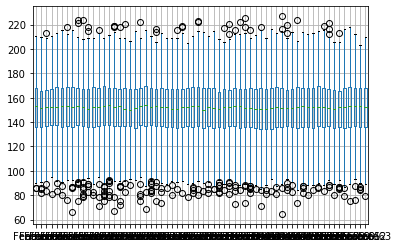

In [18]:
carpet.boxplot()

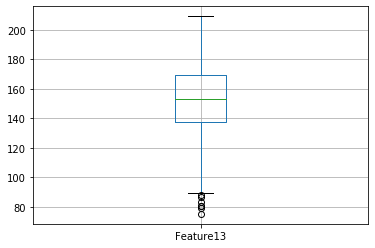

In [19]:
#boxplot 
carpet.boxplot(column=['Feature13'])

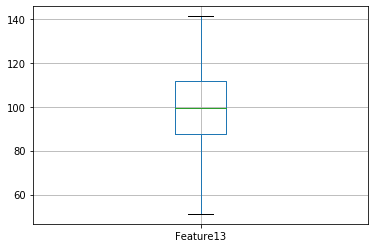

In [20]:
hardwood.boxplot(column=['Feature13'])

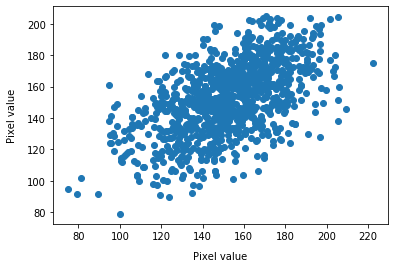

In [21]:
#scatter plot for two features in carpet
plt.scatter(carpet['Feature20'], carpet['Feature29'])
plt.xlabel('Pixel value', labelpad=10)
plt.ylabel('Pixel value', labelpad=10)
plt.show()

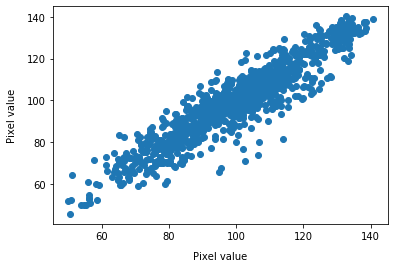

In [22]:
#scatter plot for two features in hardwoood
plt.scatter(hardwood['Feature20'], hardwood['Feature29'])
plt.xlabel('Pixel value', labelpad=10)
plt.ylabel('Pixel value', labelpad=10)
plt.show()

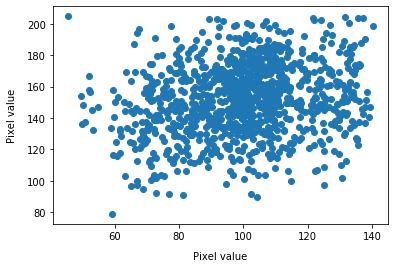

In [23]:
#scatter plot for one feature carpet and other feature of hardwood
plt.scatter(hardwood['Feature29'], carpet['Feature29'])
plt.xlabel('Pixel value', labelpad=10)
plt.ylabel('Pixel value', labelpad=10)
plt.show()

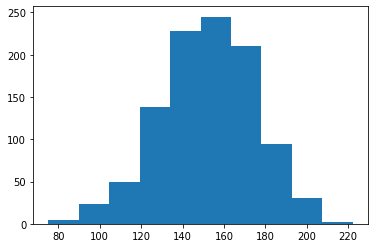

In [24]:
#histogram for Feature20 for carpet
plt.hist(carpet["Feature20"],10)
plt.show()

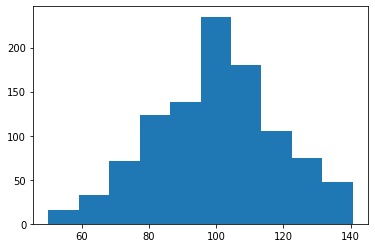

In [25]:
#histogram for feature of hardwood
plt.hist(hardwood["Feature20"],10)
plt.show()

In [26]:
#standardization
# Create the Scaler object
scaler = preprocessing.StandardScaler()
#assigning carpet.columns to num_cols ad we know all are numeric column types
num_cols= carpet.columns
print(num_cols)

Index(['Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5',
       'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10',
       'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Feature15',
       'Feature16', 'Feature17', 'Feature18', 'Feature19', 'Feature20',
       'Feature21', 'Feature22', 'Feature23', 'Feature24', 'Feature25',
       'Feature26', 'Feature27', 'Feature28', 'Feature29', 'Feature30',
       'Feature31', 'Feature32', 'Feature33', 'Feature34', 'Feature35',
       'Feature36', 'Feature37', 'Feature38', 'Feature39', 'Feature40',
       'Feature41', 'Feature42', 'Feature43', 'Feature44', 'Feature45',
       'Feature46', 'Feature47', 'Feature48', 'Feature49', 'Feature50',
       'Feature51', 'Feature52', 'Feature53', 'Feature54', 'Feature55',
       'Feature56', 'Feature57', 'Feature58', 'Feature59', 'Feature60',
       'Feature61', 'Feature62', 'Feature63'],
      dtype='object')


In [27]:
standardized_carpet = scaler.fit_transform(carpet[num_cols])

In [28]:
standardized_carpet = pd.DataFrame(standardized_carpet,columns=num_cols)

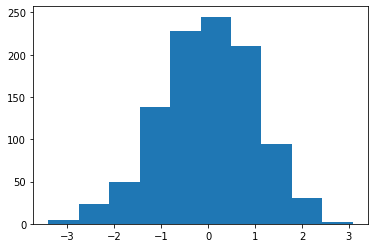

In [29]:
plt.hist(standardized_carpet["Feature20"],10)
plt.show()

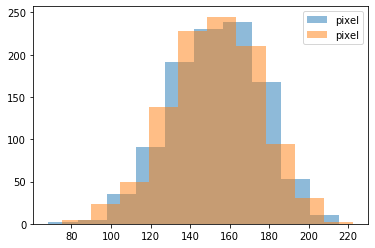

In [30]:
#Overlap the two variables before standardization
Fea21 = [carpet['Feature21']]
Fea20 = [carpet['Feature20']]

plt.hist(Fea21, alpha=0.5, label='pixel', bins=10)

plt.hist(Fea20, alpha=0.5, label='pixel', bins=10)
plt.legend(loc='upper right')
plt.show()

In [31]:
#Standardization is not required for carpet as we could see from above histogram that the range of the features is almost the same.

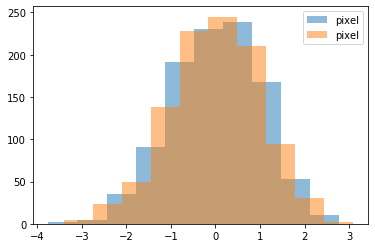

In [32]:
#Overlap the two variables 
Fea21 = [standardized_carpet['Feature21']]
Fea20 = [standardized_carpet['Feature20']]

plt.hist(Fea21, alpha=0.5, label='pixel', bins=10)

plt.hist(Fea20, alpha=0.5, label='pixel', bins=10)
plt.legend(loc='upper right')
plt.show()

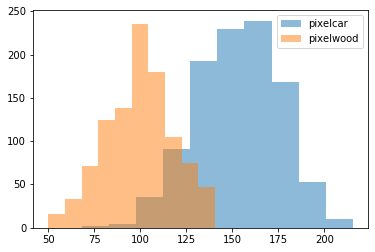

In [70]:
#Overlap the two features (carpet and hardwood) before standardization
Fea20_carpet = [carpet['Feature21']]
Fea20_hardwood = [hardwood['Feature20']]

plt.hist(Fea20_carpet, alpha=0.5, label='pixelcar', bins=10)

plt.hist(Fea20_hardwood, alpha=0.5, label='pixelwood', bins=10)
plt.legend(loc='upper right')
plt.show()
#from below graph we could see that the range carpet is slightly larger than hardwood but they overlap for common range of values.

In [34]:
#we could see common range of values for carpet and hardwood dataset as we could see the range of the features is almost the same.
#There is overlap between two datasets

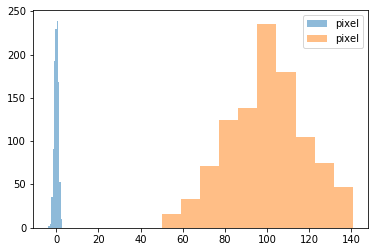

In [35]:
#Overlap the two variables before standardization of hardwood and after standardization of carpet
Fea20_carpet_stand = [standardized_carpet['Feature21']]
Fea20_hardwood = [hardwood['Feature20']]

plt.hist(Fea20_carpet_stand, alpha=0.5, label='pixel', bins=10)

plt.hist(Fea20_hardwood, alpha=0.5, label='pixel', bins=10)
plt.legend(loc='upper right')
plt.show()

In [36]:
#From the above graphs we could see that almost all the features for 
#carpet and harwood datasets ranges approximately similar
#and we do not need of any standaradization of features.

In [37]:
#Insert new column Lable with all values as '0'
carpet.insert(64, "Label",0)

In [38]:
#display of first 3 rows with 65 columns
carpet.head(3)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0    170.39    167.28    143.44    124.67    139.01    125.83    144.33   
1    169.75    190.96    175.53    138.27    137.47    139.23    133.23   
2    153.69    153.68    144.02    158.73    178.87    157.04    152.92   

   Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
0    151.26    175.51    171.31  ...     169.67     157.51     161.06   
1    130.25    147.73    163.93  ...     141.58     153.39     141.00   
2    147.52    142.87    165.26  ...     170.51     155.37     167.11   

   Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
0     133.23     124.41     138.44     142.93     137.13     134.44      0  
1     148.43     168.12     169.90     165.64     166.86     137.69      0  
2     146.89     141.01     159.43     169.68     163.24     165.17      0  

[3 rows x 65 columns]

In [39]:
#Insert new column Lable with all values as '1'
hardwood.insert(64, "Label",1)

In [40]:
#display of first 3 rows with 65 columns
hardwood.head(3)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0    93.593    89.581    86.892    89.289    87.814    87.369    85.607   
1    62.800    68.942    70.733    72.270    74.104    70.765    70.433   
2    91.456    95.562    95.546    97.105    95.005    95.161    93.941   

   Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
0    85.630    83.339    84.683  ...     77.157     57.394     65.553   
1    73.389    83.640    83.944  ...     85.389     90.223     91.711   
2    93.656    93.530    95.806  ...     96.668     88.511     88.927   

   Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
0     68.725     69.740     70.054     69.422     67.564     64.938      1  
1     93.813     92.941     92.318     91.933     86.628     86.684      1  
2     87.496     87.760     92.894     90.028     86.025     90.142      1  

[3 rows x 65 columns]

In [41]:
#to appened rows in a dataset.

In [42]:
# Read in all lines of carpet
carpet_dataframe = carpet
# Read in all lines of hardwood
hardwood_dataframe = hardwood



#merging carpet and hardwood dataframes to carwood.

In [43]:
carwood = pd.concat([carpet_dataframe, hardwood_dataframe], axis=0)

In [44]:
#Display of first 5 rows for carwood data having 65 columns
carwood.head(5)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0    170.39    167.28    143.44    124.67    139.01    125.83    144.33   
1    169.75    190.96    175.53    138.27    137.47    139.23    133.23   
2    153.69    153.68    144.02    158.73    178.87    157.04    152.92   
3    131.69    151.56    151.05    134.00    151.18    175.53    171.34   
4    162.85    158.88    132.27    138.41    143.98    159.30    177.26   

   Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
0    151.26    175.51    171.31  ...     169.67     157.51     161.06   
1    130.25    147.73    163.93  ...     141.58     153.39     141.00   
2    147.52    142.87    165.26  ...     170.51     155.37     167.11   
3    159.77    151.95    146.10  ...     155.82     157.83     152.43   
4    180.58    159.34    164.66  ...     130.96     135.74     167.31   

   Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
0     133.23     124.41     138.44     142.93     137.13     134.44      0  
1     148.43     168.12     169.90     165.64     166.86     137.69      0  
2     146.89     141.01     159.43     169.68     163.24     165.17      0  
3     150.82     146.58     128.85     140.76     177.35     174.61      0  
4     188.21     179.52     146.20     153.73     152.12     146.58      0  

[5 rows x 65 columns]

In [45]:
# Reset the index values to the second dataframe appends properly
# drop=True option avoids adding new index column with old index values
carwood=carwood.reset_index(drop=True)

In [46]:
carwood.tail(5)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
2043    98.263   100.060    98.223    95.452    98.313    95.614    97.842   
2044    75.507    73.811    73.184    72.460    73.367    72.738    73.257   
2045    97.784   101.720    99.211    99.763    89.432    86.152    88.999   
2046   119.330   118.820   119.030   118.250   117.980   117.340   119.630   
2047   109.510   108.060   106.520   109.350   111.750   109.470   107.080   

      Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
2043    99.964    97.878   101.450  ...     82.547     68.630     71.099   
2044    73.636    74.042    75.384  ...     56.945     68.075     68.707   
2045    90.974   113.630   109.990  ...    112.550    118.100    117.560   
2046   115.710   116.590   118.400  ...    109.680    105.070    110.810   
2047   107.300   112.620   107.640  ...    107.170    109.070    114.600   

      Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
2043     73.833     76.082     75.586     74.998     76.695     78.166      1  
2044     67.378     65.919     64.443     61.225     58.836     61.005      1  
2045    117.050    115.920    116.440    113.940    113.270    120.430      1  
2046    110.630    113.480    110.780    109.400    108.970    109.590      1  
2047    114.650    116.890    114.780    113.660    107.080    103.280      1  

[5 rows x 65 columns]

In [47]:
#65 columns with 2048 rows
carwood.shape

(2048, 65)

In [48]:
carwood.index

RangeIndex(start=0, stop=2048, step=1)

In [49]:
#shuffling the observations randomly

In [50]:
from sklearn.utils import shuffle
randcarwood= shuffle(carwood)

In [51]:
randcarwood.head(5)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
425    144.320   161.710   178.270   172.870   159.280   154.130   156.230   
1500    67.043    64.236    64.901    66.698    66.004    65.497    64.173   
1929   113.400   116.160   117.460   116.750   114.980   115.090   114.580   
615    167.920   179.790   151.750   164.120   172.250   196.550   164.510   
717    130.860   145.550   156.510   151.060   165.070   159.660   141.570   

      Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
425    169.010   148.880   139.070  ...    160.270    166.890    173.220   
1500    66.898    64.414    62.164  ...     49.128     69.031     67.304   
1929   111.430   117.810   119.810  ...    110.090    109.300    108.310   
615    137.350   189.800   191.580  ...    130.550    198.370    189.030   
717    127.740   161.750   156.990  ...    126.260    156.620    158.050   

      Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
425      159.58    152.990    139.080     154.70    161.840    173.550      0  
1500      65.73     60.126     57.557      63.02     61.043     59.849      1  
1929     108.83    109.560    108.820     111.73    118.290    122.630      1  
615      155.17    154.720    139.780     162.01    166.170    133.790      0  
717      151.30    120.350    127.790     162.88    185.320    163.570      0  

[5 rows x 65 columns]

In [52]:
# Reset the index values properly
# drop=True option avoids adding new index column with old index values
randcarwood=randcarwood.reset_index(drop=True)

In [53]:
randcarwood.head(5)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0   144.320   161.710   178.270   172.870   159.280   154.130   156.230   
1    67.043    64.236    64.901    66.698    66.004    65.497    64.173   
2   113.400   116.160   117.460   116.750   114.980   115.090   114.580   
3   167.920   179.790   151.750   164.120   172.250   196.550   164.510   
4   130.860   145.550   156.510   151.060   165.070   159.660   141.570   

   Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
0   169.010   148.880   139.070  ...    160.270    166.890    173.220   
1    66.898    64.414    62.164  ...     49.128     69.031     67.304   
2   111.430   117.810   119.810  ...    110.090    109.300    108.310   
3   137.350   189.800   191.580  ...    130.550    198.370    189.030   
4   127.740   161.750   156.990  ...    126.260    156.620    158.050   

   Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
0     159.58    152.990    139.080     154.70    161.840    173.550      0  
1      65.73     60.126     57.557      63.02     61.043     59.849      1  
2     108.83    109.560    108.820     111.73    118.290    122.630      1  
3     155.17    154.720    139.780     162.01    166.170    133.790      0  
4     151.30    120.350    127.790     162.88    185.320    163.570      0  

[5 rows x 65 columns]

In [54]:
randcarwood.index

RangeIndex(start=0, stop=2048, step=1)

In [55]:
randcarwood.tail(5)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
2043    118.33   122.010   124.980   125.430   125.530   127.530   129.350   
2044     91.20    89.591    92.659    87.368    89.371    91.797    91.412   
2045    172.97   174.530   159.850   113.500   111.450   135.620   137.780   
2046    151.06   156.190   169.350   179.210   170.320   165.900   191.270   
2047    139.30   103.130   116.260   142.570   169.960   194.420   180.320   

      Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
2043   124.870   129.180   130.940  ...     112.39     120.29     119.80   
2044    91.794    97.152    97.892  ...     103.23     100.35     101.48   
2045   151.790   148.390   159.160  ...     132.65     164.33     162.36   
2046   215.430   139.200   150.550  ...     132.35     167.13     186.15   
2047   144.840   106.030   114.570  ...     127.88     133.02     148.00   

      Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
2043     121.51     120.85     122.53     127.37     128.00     130.28      1  
2044     100.36     100.28     101.45     100.57     100.48     100.62      1  
2045     138.59     108.60     127.29     135.96     129.38     160.74      0  
2046     172.18     136.21     143.76     161.15     166.25     171.24      0  
2047     179.02     195.01     177.99     156.09     160.77     135.97      0  

[5 rows x 65 columns]

In [56]:
randcarwood.shape

(2048, 65)

In [57]:
#split data into training and testing datasets
#train 80%,test 20%

In [58]:
from sklearn.model_selection import train_test_split


In [59]:
Trainrandcarwood80,Testrandcarwood20=train_test_split(randcarwood,test_size=0.2)


In [60]:
Trainrandcarwood80.head(5)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
736     178.36    153.46    150.79    174.57    171.27    153.47    135.96   
1385    164.46    143.03    125.24    145.60    161.35    147.97    128.39   
418     160.30    170.25    179.13    174.66    161.78    173.15    175.10   
437     124.40    147.77    145.08    148.84    155.46    155.08    158.86   
1602    149.66    179.22    194.29    158.72    125.00    135.38    152.81   

      Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
736     112.55    190.49    152.06  ...     134.97     163.10     145.99   
1385    139.79    169.17    139.49  ...     139.29     130.15     129.08   
418     152.76    146.57    173.54  ...     131.66     123.06     148.47   
437     126.57    126.77    132.01  ...     129.49     130.87     120.85   
1602    154.23    161.47    164.66  ...     163.55     132.71     146.93   

      Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
736      140.13     144.52     165.78     162.02     119.85     125.81      0  
1385     143.54     143.03     149.95     138.22     128.81     133.43      0  
418      145.23     133.27     140.87     150.35     134.88     118.83      0  
437      128.75     152.19     147.54     134.58     121.29     124.05      0  
1602     143.04     169.60     194.89     196.65     198.02     174.71      0  

[5 rows x 65 columns]

In [61]:
Trainrandcarwood80.shape

(1638, 65)

In [62]:
Trainrandcarwood80.tail(5)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
1743   190.250   191.040   160.360   164.880   198.530   169.210   129.650   
1634    90.691    88.541    90.055    90.579    89.224    90.615    89.997   
1478   152.400   155.530   150.950   144.670   159.900   170.570   141.350   
1076   104.910   107.990   104.470   103.510   104.770   102.340   103.160   
1990    76.400    76.243    74.403    72.328    70.551    71.789    71.993   

      Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
1743   122.830   173.230   177.900  ...    165.390    153.460    129.350   
1634    88.567    94.445    92.941  ...     98.385    100.550     97.197   
1478   135.980   130.810   148.800  ...    140.360    130.490    137.980   
1076   102.450   108.640   105.520  ...    104.790    105.670    106.430   
1990    72.257    87.650    87.458  ...     90.970     90.996     89.995   

      Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
1743    118.150    140.720    179.370    183.410    173.680    164.060      0  
1634     97.212     98.346    103.110    100.390     99.004     99.318      1  
1478    147.780    140.030    151.340    170.230    162.710    158.080      0  
1076    101.530    100.140    105.220    107.440    107.110    104.970      1  
1990     91.074     94.630     94.529     93.436     93.970     94.453      1  

[5 rows x 65 columns]

In [63]:
Testrandcarwood20.head(5)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
1120   117.890    117.59   118.610   119.550   121.880   119.350   118.980   
1638   126.920    127.75   130.790   130.260   126.520   126.050   125.450   
1771    87.727     89.09    90.775    89.292    91.626    91.369    96.477   
1218   101.290    101.20   101.090   100.350   101.640   104.770   100.390   
1920   151.350    132.75   147.300   169.760   170.540   164.850   173.450   

      Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
1120    119.48   109.660   112.890  ...    113.330    109.790    111.760   
1638    123.94   130.640   127.310  ...    127.040    125.300    126.330   
1771     97.45    94.018    93.731  ...     94.435     87.455     88.992   
1218    102.39   101.830   100.250  ...     99.230    101.200    100.020   
1920    174.55   153.000   134.760  ...    134.990    166.470    141.020   

      Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
1120    110.370    107.440    101.570     99.348     97.368     99.114      1  
1638    126.310    130.060    132.170    133.320    134.960    131.470      1  
1771     92.539     92.163     94.569     96.743     96.726     96.937      1  
1218     99.107     95.373     96.427     99.237     99.974    100.440      1  
1920    110.740    116.260    154.970    177.760    173.330    142.020      0  

[5 rows x 65 columns]

In [64]:
Testrandcarwood20.shape

(410, 65)

In [65]:
Testrandcarwood20.tail(5)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
1883   131.010   131.250   158.110   186.210   198.350   175.980   132.110   
1260   154.740   135.890   131.550   150.530   165.470   150.550   134.280   
1850   153.410   173.650   168.810   143.560   130.350   128.610   138.260   
1643    76.899    74.310    73.606    74.435    75.327    75.905    74.593   
1272    91.732    90.746    89.813    90.900    92.078    95.617    93.595   

      Feature7  Feature8  Feature9  ...  Feature55  Feature56  Feature57  \
1883   121.030   121.770   129.590  ...    169.410    179.720    155.790   
1260   153.450   163.850   142.860  ...    156.240    150.250    166.910   
1850   132.690   142.400   157.310  ...    136.500    140.550    159.850   
1643    74.236    74.300    72.201  ...     61.613     55.398     57.902   
1272    93.518    92.506    93.372  ...     89.240     93.512     94.025   

      Feature58  Feature59  Feature60  Feature61  Feature62  Feature63  Label  
1883    131.130    141.550    170.180    191.130    194.440    149.830      0  
1260    162.640    136.630    156.840    167.280    147.490    154.210      0  
1850    159.910    148.560    136.890    148.330    156.470    132.780      0  
1643     58.355     56.768     52.591     53.559     56.438     53.683      1  
1272     94.807     91.998     92.680     91.449     89.028     93.056      1  

[5 rows x 65 columns]

In [66]:
carwood.to_csv('C:/Users/13017/Desktop/604/Assignment1/carwood.csv')

In [67]:
randcarwood.to_csv('C:/Users/13017/Desktop/604/Assignment1/randcarwood.csv')

In [68]:
Trainrandcarwood80.to_csv('C:/Users/13017/Desktop/604/Assignment1/Trainrandcarwood80.csv')

In [69]:
Testrandcarwood20.to_csv('C:/Users/13017/Desktop/604/Assignment1/Testrandcarwood20.csv')